<a href="https://colab.research.google.com/github/MhmmdIkra/Analisis-Visualisasi-Data/blob/main/UTS_AVD_SupervisedLearninng_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import library yang dibutuhkan**

Kode ini adalah persiapan awal untuk membangun model regresi linear, yang mencakup pengelolaan data, pemrosesan fitur kategorikal, pembagian data, pembuatan pipeline, dan evaluasi model menggunakan metrik performa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import

# **Upload Dataset**

Kode ini digunakan untuk mengunggah dan membaca file dataset CSV (dalam hal ini Laptop price.csv) ke dalam Google Colab agar bisa dianalisis lebih lanjut

In [ ]:
from google.colab import files

# Upload file CSV
uploaded = files.upload()

# Membaca dataset
df = pd.read_csv('Laptop price.csv')

Saving Laptop price.csv to Laptop price.csv


# **Pilih kolom-kolom yang relevan untuk prediksi**

Kode ini bertujuan untuk memfilter hanya kolom yang penting dari dataset dan membersihkannya dari data yang tidak lengkap (missing value), sehingga siap diproses lebih lanjut.

In [ ]:
selected_columns = [
    'Company', 'TypeName', 'Inches', 'CPU_Company', 'CPU_Frequency (GHz)',
    'RAM (GB)', 'Memory', 'GPU_Company', 'Weight (kg)', 'Price (Euro)'
]
df = df[selected_columns].dropna()

# **Preprocessing Harga**

Kode ini membersihkan kolom harga dari simbol dan format non-numerik, lalu mengubahnya menjadi angka desimal (float), agar bisa digunakan untuk perhitungan atau model machine learning.

In [ ]:
df['Price (Euro)'] = df['Price (Euro)'].replace({'€': '', ',': ''}, regex=True).astype(float)

# Cek hasilnya
df['Price (Euro)'].head()

,Price (Euro)
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


# **Memisahkan Fitur dan Target**

X (fitur/input): data yang akan digunakan untuk memprediksi

y (target/output): nilai yang ingin diprediksi, yaitu harga laptop

In [ ]:
X = df.drop('Price (Euro)', axis=1)
y = df['Price (Euro)']

# **Siapkan Preprocessing Pipeline**

Kode bertujuan untuk memisahkan fitur numerik dan kategorikal, lalu menyiapkan langkah pra-pemrosesan dengan ColumnTransformer. Fitur numerik seperti ukuran layar, frekuensi CPU, RAM, dan berat laptop dibiarkan tanpa diubah (passthrough), sedangkan fitur kategorikal seperti merek laptop, tipe, jenis CPU, memori, dan GPU akan dikonversi menjadi format numerik menggunakan OneHotEncoder. Semua ini disatukan dalam preprocessor, sehingga data bisa langsung diproses dalam pipeline machine learning secara otomatis dan konsisten.

In [ ]:
numerical_features = ['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)']
categorical_features = ['Company', 'TypeName', 'CPU_Company', 'Memory', 'GPU_Company']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# **Buat dan Latih Model Regresi**

Kode ini membangun sebuah pipeline machine learning yang terdiri dari dua langkah utama: pertama, melakukan pra-pemrosesan data (preprocessor) yang telah didefinisikan sebelumnya, dan kedua, melatih model regresi linear (LinearRegression). Setelah pipeline disiapkan, data dibagi menjadi data latih dan data uji dengan proporsi 80:20 menggunakan train_test_split. Kemudian, pipeline dilatih menggunakan data latih (X_train, y_train), yang secara otomatis menjalankan proses pra-pemrosesan dan pelatihan model dalam satu alur yang efisien dan rapi

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Inches',
                                                   'CPU_Frequency (GHz)',
                                                   'RAM (GB)', 'Weight (kg)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'TypeName',
                                                   'CPU_Company', 'Memory',
                                                   'GPU_Company'])])),
                ('regressor', LinearRegression())])

# **Predeksi dan Evaluasi**

Kode ini digunakan untuk mengevaluasi performa model setelah proses pelatihan selesai. Pertama, model melakukan prediksi harga laptop pada data uji (X_test) dan menyimpannya dalam y_pred. Kemudian, dua metrik evaluasi dihitung: Mean Squared Error (MSE) untuk mengetahui seberapa besar rata-rata kesalahan kuadrat antara prediksi dan nilai asli, serta R² Score untuk mengukur seberapa baik model menjelaskan variansi dalam data (semakin mendekati 1, semakin baik). Hasil evaluasi ini kemudian ditampilkan lewat print(), sehingga kita bisa melihat seberapa akurat model dalam memprediksi harga laptop.

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Mean Squared Error (MSE): 156626.81340837516
R2 Score: 0.7879906580512521


# **Visualisasi Hasil**

Kode ini digunakan untuk memvisualisasikan seberapa baik model memprediksi harga laptop dengan cara membandingkan harga asli (y_test) dan hasil prediksi (y_pred). Grafik scatter dibuat dengan sumbu X mewakili harga asli dan sumbu Y mewakili harga prediksi. Jika prediksi model sempurna, maka semua titik akan berada di garis diagonal. Visualisasi ini membantu melihat apakah model cenderung overestimasi atau underestimasi pada harga tertentu. Tampilan ditingkatkan dengan ukuran figur, transparansi titik (alpha=0.7), warna biru, label sumbu, judul grafik, dan grid agar grafik lebih informatif dan mudah dibaca.

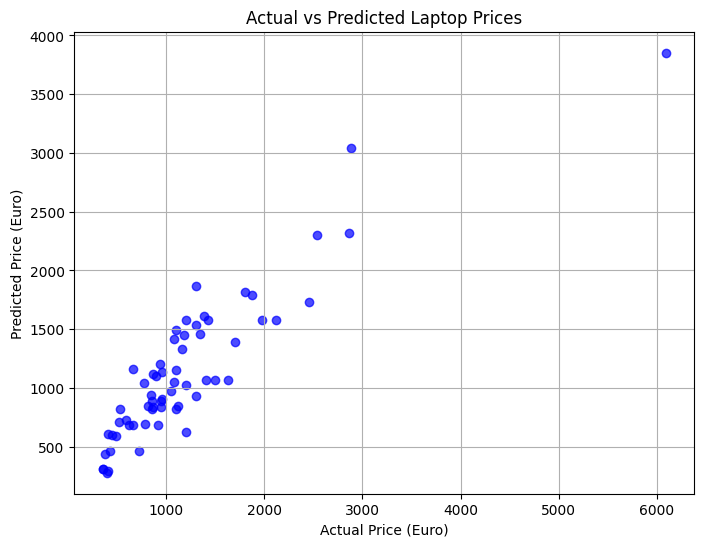

In [ ]:
# Visualisasi perbandingan harga asli dan prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Price (Euro)")
plt.ylabel("Predicted Price (Euro)")
plt.title("Actual vs Predicted Laptop Prices")
plt.grid(True)
plt.show()